In [1]:
import pandas as pd
data= pd.read_csv('Tatacoffee13_21.csv', parse_dates=['Date'], index_col='Date')
dataset=data.loc['2021-07-01':'2022-01-28']
dataset

,Open,High,Low,Close
Date,,,,
2021-07-01,188.60,189.00,183.00,184.55
2021-07-02,183.05,187.50,182.15,186.40
2021-07-05,187.85,198.35,187.85,192.45
2021-07-06,193.80,194.80,187.35,188.80
2021-07-07,187.80,193.95,185.40,192.85
...,...,...,...,...
2021-12-22,202.90,207.80,201.35,205.00
2021-12-23,206.00,206.85,202.05,202.95
2021-12-24,203.90,203.90,199.35,201.00


In [2]:
column='Close'

In [3]:
from sklearn.preprocessing import MinMaxScaler
Ms=MinMaxScaler()
data1=Ms.fit_transform(dataset[[column]])
print('Len:',data1.shape)

Len: (123, 1)


In [4]:
len(data1)

123

In [5]:
training_size=round(len(data1)* 0.85)
print(training_size)
x_train=data1[:training_size]
x_test=data1[training_size:]
print("x_train length:",x_train.shape)
print("x_test length:",x_test.shape)
y_train=data1[:training_size]
y_test=data1[training_size:]
print("x_train length:",y_train.shape)
print("x_test length:",y_test.shape)

105
x_train length: (105, 1)
x_test length: (18, 1)
x_train length: (105, 1)
x_test length: (18, 1)


In [6]:
import warnings
warnings.filterwarnings("ignore")

In [7]:
from sklearn.metrics import mean_squared_error
orders=[(1,0,2),(1,0,1),(2,0,1)]
from statsmodels.tsa.arima.model import ARIMA
for i in orders:
    model=ARIMA(x_train, order=i)
    model_fit=model.fit()
    #make prediction
    y_pred=model_fit.predict(len(x_train), len(data1)-1)
    from stockFunctions import rmsemape
    print("Order={}". format(i))
    rmsemape(y_test, y_pred)
    print('*****************')

Order=(1, 0, 2)
RMSE-Testset: 0.12674479984228887
maPe-Testset: 0.23628371868767128
*****************
Order=(1, 0, 1)
RMSE-Testset: 0.1253442654345974
maPe-Testset: 0.23733264732132092
*****************
Order=(2, 0, 1)
RMSE-Testset: 0.12535413032440765
maPe-Testset: 0.23726898897623375
*****************


In [8]:
len(y_pred)

18

In [9]:
order=(1,0,1)
model=ARIMA(x_train, order=order)
model_fit=model.fit()
#make prediction
y_pred=model_fit.predict(len(x_train), len(data1)-1)

mse=mean_squared_error(y_test, y_pred, squared=False)
from stockFunctions import rmsemape
print("Order={}".format(order))
rmsemape(y_test,y_pred)
print("************")

Order=(1, 0, 1)
RMSE-Testset: 0.1253442654345974
maPe-Testset: 0.23733264732132092
************


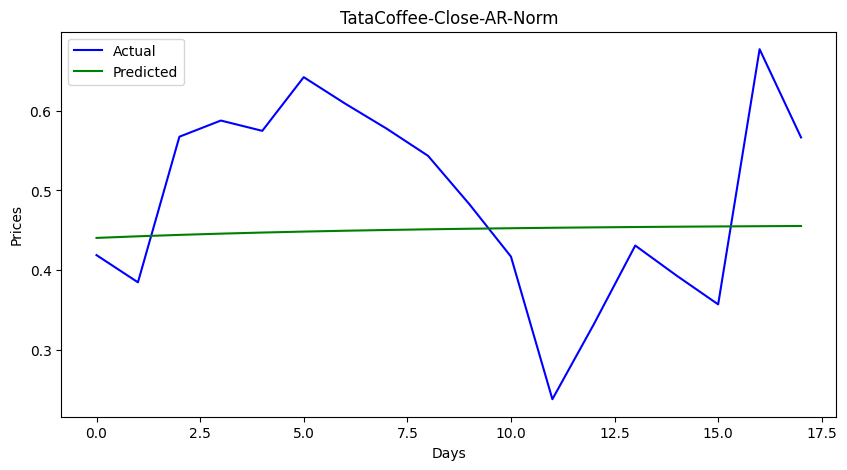

In [10]:
from stockFunctions import graph
graph(y_test,y_pred,"Actual","Predicted","TataCoffee-Close-AR-Norm","Days","Prices")

In [11]:
len(data1)

123

In [12]:
y_test

array([[0.41866913],
       [0.3844732 ],
       [0.56746765],
       [0.58780037],
       [0.57486137],
       [0.64232902],
       [0.6090573 ],
       [0.57763401],
       [0.54343808],
       [0.48243993],
       [0.4168207 ],
       [0.23752311],
       [0.33179298],
       [0.43068392],
       [0.39279113],
       [0.35674677],
       [0.67744917],
       [0.56654344]])

In [13]:
from stockFunctions import conversionSingle
aTestNormTable=conversionSingle(y_test,[column])

In [14]:
aTestNormTable

,Close
0,0.418669
1,0.384473
2,0.567468
3,0.5878
4,0.574861
5,0.642329
6,0.609057
7,0.577634
8,0.543438
9,0.48244


In [15]:
actual_stock_price_test_ori=Ms.inverse_transform(aTestNormTable)
actual_stock_price_test_ori

array([[204.35],
       [202.5 ],
       [212.4 ],
       [213.5 ],
       [212.8 ],
       [216.45],
       [214.65],
       [212.95],
       [211.1 ],
       [207.8 ],
       [204.25],
       [194.55],
       [199.65],
       [205.  ],
       [202.95],
       [201.  ],
       [218.35],
       [212.35]])

In [16]:
actual_stock_price_test_oriA=conversionSingle(actual_stock_price_test_ori,[column])
actual_stock_price_test_oriA

,Close
0,204.35
1,202.5
2,212.4
3,213.5
4,212.8
5,216.45
6,214.65
7,212.95
8,211.1
9,207.8


In [17]:
from stockFunctions import conversionSingle
aTestNormTable=conversionSingle(y_test,[column])
actual_stock_price_test_ori=Ms.inverse_transform(aTestNormTable)
actual_stock_price_test_oriA=conversionSingle(actual_stock_price_test_ori,[column])

In [18]:
from stockFunctions import conversionSingle
pTestNormTable=conversionSingle(y_pred,[column])
predicted_stock_price_test_ori=Ms.inverse_transform(pTestNormTable)
predicted_stock_price_test_oriP=conversionSingle(predicted_stock_price_test_ori,[column])

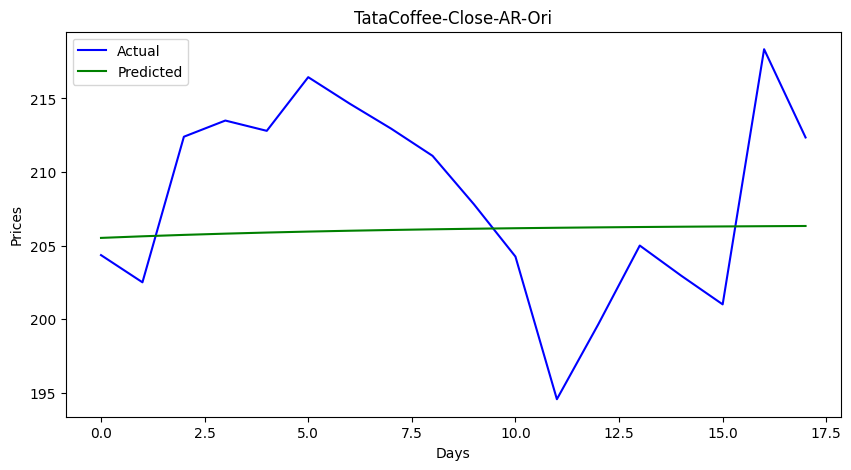

In [19]:
from stockFunctions import conversionSingle
graph(actual_stock_price_test_oriA,predicted_stock_price_test_oriP,"Actual","Predicted","TataCoffee-Close-AR-Ori","Days","Prices")

In [20]:
from stockFunctions import rmsemape
rmsemape(actual_stock_price_test_oriA,predicted_stock_price_test_oriP)

RMSE-Testset: 6.781124760011725
maPe-Testset: 0.02825805543583895


In [21]:
forecast=model_fit.predict(len(data1),len(data1)+5)

In [22]:
forecast

array([0.45550192, 0.45570872, 0.45589097, 0.45605157, 0.45619309,
       0.45631781])

In [23]:
from stockFunctions import conversionSingle
fTestNormTable=conversionSingle(forecast,['Closefore'])
forecast_stock_price_ori=Ms.inverse_transform(fTestNormTable)
forecast_stock_price_oriF=conversionSingle(forecast_stock_price_ori,['Closefore'])
forecast_stock_price_oriF

,Closefore
0,206.342654
1,206.353842
2,206.363701
3,206.37239
4,206.380046
5,206.386793


In [24]:
#forecast_stock_price_test_oriF.to_csv("CloseAR.csv",index=False)